In [1]:
pip install opencv-python-headless

Note: you may need to restart the kernel to use updated packages.


In [2]:
!pip install opencv-python

In [3]:
import numpy as np
import cv2
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

In [4]:
import os

cwd = os.getcwd()
print(cwd)


/Users/rishisathwik


In [5]:
import os

os.chdir('/Users/rishisathwik/Desktop/Applications/ASU/SEM1/python projects/py11-image classify')

In [6]:
import os

cwd = os.getcwd()
print(cwd)


/Users/rishisathwik/Desktop/Applications/ASU/SEM1/python projects/py11-image classify


In [7]:
img = cv2.imread('./model/test_images/pretty-maria-sharapova-visits-nike-head-quarters-and-porsche-opening-pics-and-video-inside.jpeg')
img.shape

(525, 700, 3)

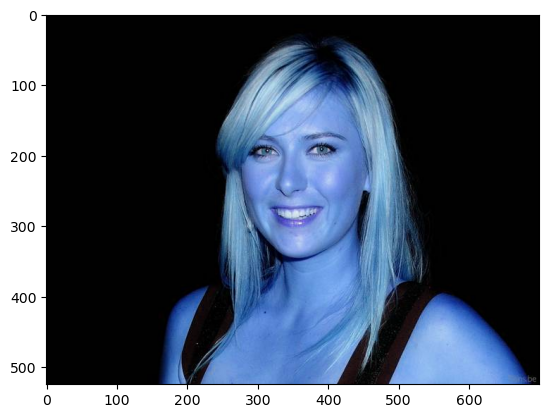

In [8]:
plt.imshow(img)

In [9]:
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
gray.shape

(525, 700)

In [10]:
gray

array([[1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       ...,
       [1, 1, 1, ..., 3, 2, 2],
       [1, 1, 1, ..., 3, 2, 2],
       [1, 1, 1, ..., 3, 2, 2]], dtype=uint8)

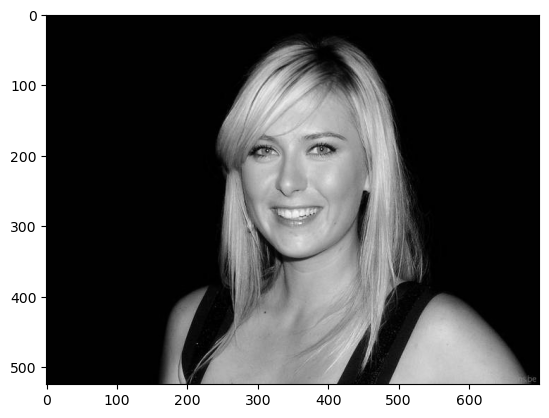

In [11]:
plt.imshow(gray,cmap='gray')

In [12]:
# to detect face details from image using HAAR Cascade

In [13]:
face_cascade = cv2.CascadeClassifier('./model/opencv/haarcascades/haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('./model/opencv/haarcascades/haarcascade_eye.xml')

faces = face_cascade.detectMultiScale(gray, 1.3, 5)
faces

array([[239, 108, 229, 229]], dtype=int32)

In [14]:
(x,y,w,h) = faces[0]
x,y,w,h #face coordinates for above image

(239, 108, 229, 229)

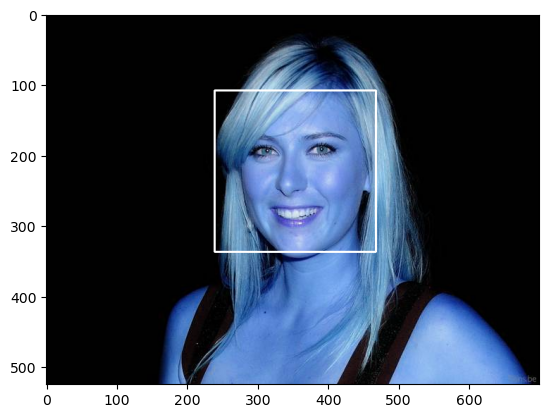

In [15]:
face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,255,255),2)
plt.imshow(face_img)

In [16]:
# now we should detect 2 eyes 

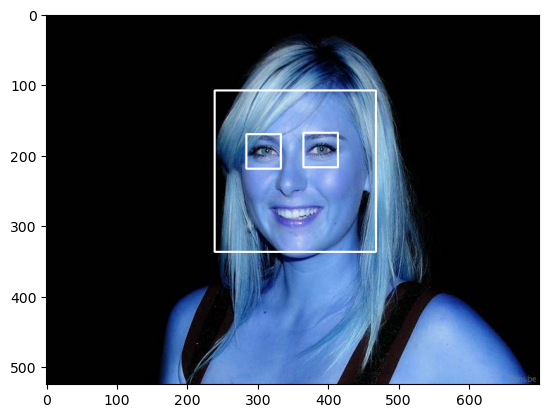

In [17]:
cv2.destroyAllWindows()
for (x,y,w,h) in faces:
    face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,255,255),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = face_img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(255,255,255),2)
        

plt.figure()
plt.imshow(face_img, cmap='gray')
plt.show()

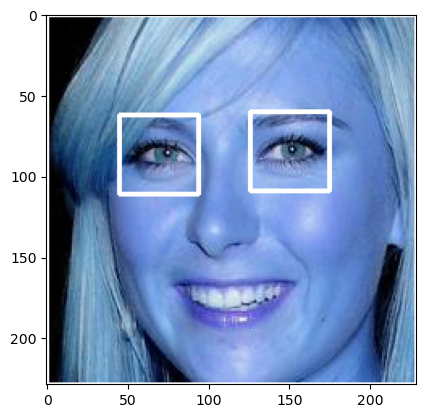

In [18]:
%matplotlib inline
plt.imshow(roi_color,cmap='gray')

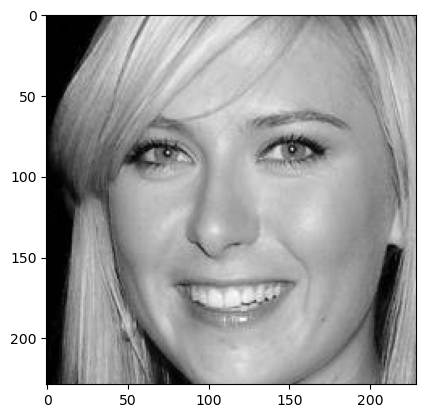

In [19]:
%matplotlib inline
plt.imshow(roi_gray,cmap='gray')

In [20]:
# now let us write a function to automate the cropping images

In [21]:
#def get_cropped_image_if_2_eyes(image_path):
 #   img = cv2.imread(image_path)
  #  gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
   # faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    #for (x,y,w,h) in faces:
     #   roi_gray = gray[y:y+h, x:x+w]
      #  roi_color = img[y:y+h, x:x+w]
       # eyes = eye_cascade.detectMultiScale(roi_gray)
        #if len(eyes) >= 2:
         #   return roi_color
from PIL import Image

def get_cropped_image_if_2_eyes(image_path):
    img = Image.open(image_path)
    img = cv2.cvtColor(np.array(img), cv2.COLOR_RGB2BGR)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    for (x,y,w,h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        if len(eyes) >= 2:
            return roi_color

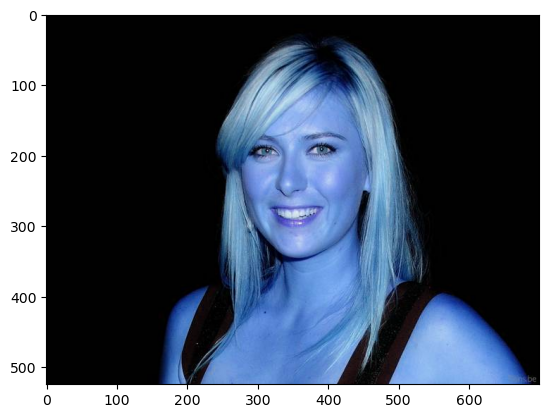

In [22]:
original_image = cv2.imread('./model/test_images/pretty-maria-sharapova-visits-nike-head-quarters-and-porsche-opening-pics-and-video-inside.jpeg')
plt.imshow(original_image)

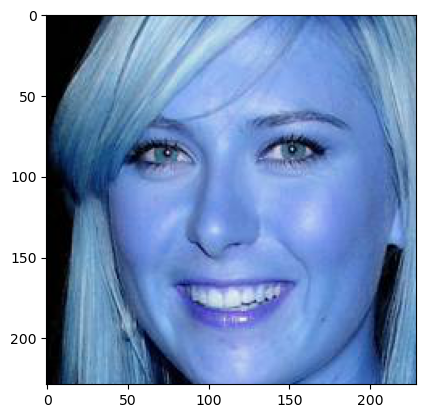

In [23]:
cropped_image = get_cropped_image_if_2_eyes('./model/test_images/pretty-maria-sharapova-visits-nike-head-quarters-and-porsche-opening-pics-and-video-inside.jpeg')
plt.imshow(cropped_image)

In [24]:
# if the image has no proper visible eyes then we need to ignore them as below

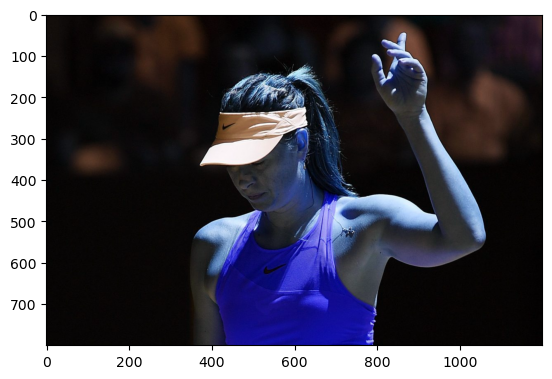

In [25]:
org_image_obstructed = cv2.imread('./model/test_images/NINTCHDBPICT000555871244-e1579584387360.jpeg')
plt.imshow(org_image_obstructed)

In [26]:
cropped_image_no_2_eyes = get_cropped_image_if_2_eyes('./model/test_images/NINTCHDBPICT000555871244-e1579584387360.jpeg')
cropped_image_no_2_eyes # it wont return anything as it has no clear eyes

In [27]:
path_to_data = "./model/dataset/"
path_to_cr_data = "./model/dataset/cropped/"

In [28]:
import os
img_dirs = []
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)

In [29]:
img_dirs

['./model/dataset/maria_sharapova',
 './model/dataset/virat_kohli',
 './model/dataset/lionel_messi',
 './model/dataset/serena_williams',
 './model/dataset/roger_federer']

In [30]:
import shutil
if os.path.exists(path_to_cr_data):
    shutil.rmtree(path_to_cr_data)
os.mkdir(path_to_cr_data)

In [31]:
cropped_image_dirs = []
celebrity_file_names_dict = {}

for img_dir in img_dirs:
    count = 1
    celebrity_name = img_dir.split('/')[-1]
    print(celebrity_name)
    
    celebrity_file_names_dict[celebrity_name] = []
    
    for entry in os.scandir(img_dir):
        if entry.name.endswith('.jpg') or entry.name.endswith('.jpeg') or entry.name.endswith('.png'):
            roi_color = get_cropped_image_if_2_eyes(entry.path)
            if roi_color is not None:
                cropped_folder = os.path.join(path_to_cr_data, celebrity_name)
                if not os.path.exists(cropped_folder):
                    os.makedirs(cropped_folder)
                    cropped_image_dirs.append(cropped_folder)
                    print("generating cropped images in folder: ", cropped_folder)
                cropped_file_name = f"{celebrity_name}_{count}.png"
                cropped_file_path = os.path.join(cropped_folder, cropped_file_name)
                
                cv2.imwrite(cropped_file_path, roi_color)
                celebrity_file_names_dict[celebrity_name].append(cropped_file_path)
                count += 1


maria_sharapova
generating cropped images in folder:  ./model/dataset/cropped/maria_sharapova
virat_kohli
generating cropped images in folder:  ./model/dataset/cropped/virat_kohli
lionel_messi
generating cropped images in folder:  ./model/dataset/cropped/lionel_messi
serena_williams
generating cropped images in folder:  ./model/dataset/cropped/serena_williams
roger_federer
generating cropped images in folder:  ./model/dataset/cropped/roger_federer


In [32]:
for img_dir in cropped_image_dirs:
    celebrity_name = img_dir.split('/')[-1]
    file_list = []
    for entry in os.scandir(img_dir):
        file_list.append(entry.path)
    celebrity_file_names_dict[celebrity_name] = file_list

In [33]:
celebrity_file_names_dict

{'maria_sharapova': ['./model/dataset/cropped/maria_sharapova/maria_sharapova_14.png',
  './model/dataset/cropped/maria_sharapova/maria_sharapova_15.png',
  './model/dataset/cropped/maria_sharapova/maria_sharapova_17.png',
  './model/dataset/cropped/maria_sharapova/maria_sharapova_16.png',
  './model/dataset/cropped/maria_sharapova/maria_sharapova_12.png',
  './model/dataset/cropped/maria_sharapova/maria_sharapova_13.png',
  './model/dataset/cropped/maria_sharapova/maria_sharapova_11.png',
  './model/dataset/cropped/maria_sharapova/maria_sharapova_10.png',
  './model/dataset/cropped/maria_sharapova/maria_sharapova_8.png',
  './model/dataset/cropped/maria_sharapova/maria_sharapova_9.png',
  './model/dataset/cropped/maria_sharapova/maria_sharapova_1.png',
  './model/dataset/cropped/maria_sharapova/maria_sharapova_2.png',
  './model/dataset/cropped/maria_sharapova/maria_sharapova_3.png',
  './model/dataset/cropped/maria_sharapova/maria_sharapova_7.png',
  './model/dataset/cropped/maria_sh

In [34]:
import numpy as np
import pywt
from PIL import Image

def w2d(img, mode='haar', level=1):
    # Convert PIL image to numpy array
    imArray = np.array(img)
    
    # Datatype conversions
    # Convert to grayscale
    imArray = np.array(Image.fromarray(imArray).convert('L'))
    # Convert to float
    imArray = np.float32(imArray) / 255.0
    
    # Compute coefficients
    coeffs = pywt.wavedec2(imArray, mode, level=level)
    
    # Process Coefficients
    coeffs_H = list(coeffs)
    coeffs_H[0] *= 0
    
    # Reconstruction
    imArray_H = pywt.waverec2(coeffs_H, mode)
    imArray_H *= 255
    imArray_H = np.uint8(imArray_H)
    
    return imArray_H


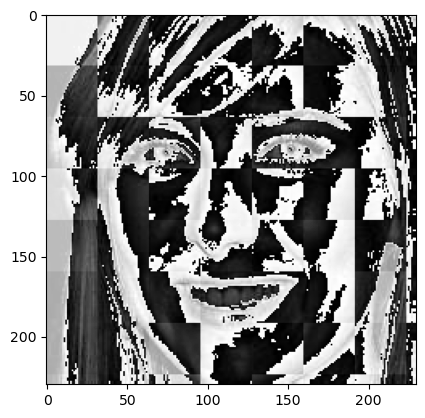

In [35]:
im_har = w2d(cropped_image,'db1',5)
plt.imshow(im_har, cmap='gray')

In [36]:
class_dict ={}
count = 0
for celebrity_name in celebrity_file_names_dict.keys():
    class_dict[celebrity_name] = count
    count+=1
class_dict

{'maria_sharapova': 0,
 'virat_kohli': 1,
 'lionel_messi': 2,
 'serena_williams': 3,
 'roger_federer': 4}

In [37]:
X, y = [], []
for celebrity_name, training_files in celebrity_file_names_dict.items():
    for training_image in training_files:
        img = cv2.imread(training_image)
        if img is None:
            continue
        scalled_raw_img = cv2.resize(img, (32, 32))
        img_har = w2d(img,'db1',5)
        scalled_img_har = cv2.resize(img_har, (32, 32))
        combined_img = np.vstack((scalled_raw_img.reshape(32*32*3,1),scalled_img_har.reshape(32*32,1)))
        X.append(combined_img)
        y.append(class_dict[celebrity_name]) 

In [38]:
len(X)

96

In [39]:
X = np.array(X).reshape(len(X),4096).astype(float)
X.shape

(96, 4096)

In [40]:
X[0]

array([168., 176., 193., ..., 213., 227.,   1.])

In [41]:
y[0]

0

In [42]:
#model training

In [43]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

pipe = Pipeline([('scaler', StandardScaler()), ('svc', SVC(kernel = 'rbf', C = 10))])
pipe.fit(X_train, y_train)
pipe.score(X_test, y_test)

0.6666666666666666

In [55]:
print(classification_report(y_test, pipe.predict(X_test)))


              precision    recall  f1-score   support

           0       0.86      0.86      0.86         7
           1       0.67      0.50      0.57         4
           2       0.55      0.86      0.67         7
           3       0.00      0.00      0.00         3
           4       1.00      0.67      0.80         3

    accuracy                           0.67        24
   macro avg       0.61      0.58      0.58        24
weighted avg       0.65      0.67      0.64        24



In [56]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

In [57]:
model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto',probability=True),
        'params' : {
            'svc__C': [1,10,100,1000],
            'svc__kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'randomforestclassifier__n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'logisticregression__C': [1,5,10]
        }
    }
}

In [58]:
scores = []
best_estimators = {}
import pandas as pd
for algo, mp in model_params.items():
    pipe = make_pipeline(StandardScaler(), mp['model'])
    clf =  GridSearchCV(pipe, mp['params'], cv=5, return_train_score=False)
    clf.fit(X_train, y_train)
    scores.append({
        'model': algo,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    best_estimators[algo] = clf.best_estimator_
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

,model,best_score,best_params
0,svm,0.678095,"{'svc__C': 1, 'svc__kernel': 'linear'}"
1,random_forest,0.678095,{'randomforestclassifier__n_estimators': 10}
2,logistic_regression,0.707619,{'logisticregression__C': 10}


In [59]:
best_estimators

{'svm': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('svc',
                  SVC(C=1, gamma='auto', kernel='linear', probability=True))]),
 'random_forest': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('randomforestclassifier',
                  RandomForestClassifier(n_estimators=10))]),
 'logistic_regression': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('logisticregression',
                  LogisticRegression(C=10, solver='liblinear'))])}

In [60]:
best_estimators['svm'].score(X_test,y_test)

0.7083333333333334

In [62]:
best_estimators['random_forest'].score(X_test,y_test)

0.7083333333333334

In [63]:
best_estimators['logistic_regression'].score(X_test,y_test)


0.8333333333333334

In [71]:
best_clf = best_estimators['logistic_regression']


In [72]:
best_clf

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression',
                 LogisticRegression(C=10, solver='liblinear'))])

In [73]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, best_clf.predict(X_test))
cm

array([[7, 0, 0, 0, 0],
       [0, 3, 1, 0, 0],
       [1, 0, 6, 0, 0],
       [1, 0, 0, 1, 1],
       [0, 0, 0, 0, 3]])

Text(95.72222222222221, 0.5, 'Truth')

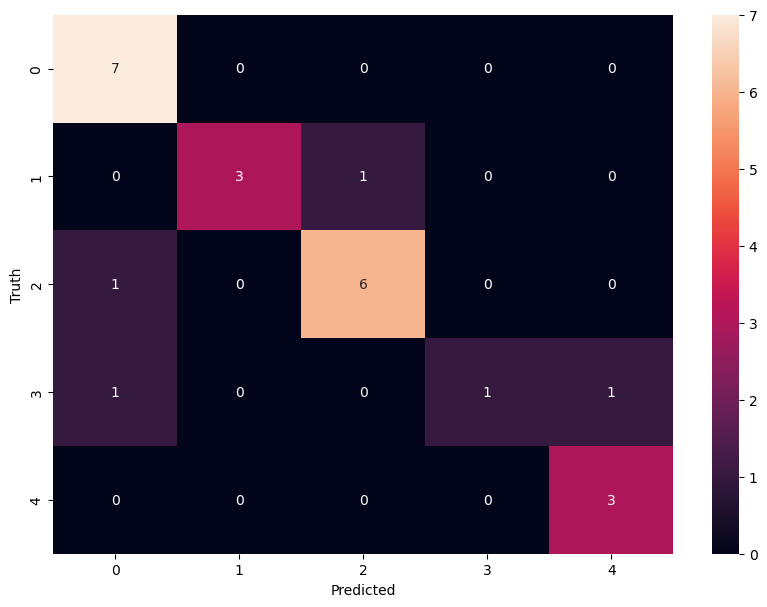

In [74]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [75]:
class_dict

{'maria_sharapova': 0,
 'virat_kohli': 1,
 'lionel_messi': 2,
 'serena_williams': 3,
 'roger_federer': 4}

In [76]:
!pip install joblib
import joblib 
# Save the model as a pickle in a file 
joblib.dump(best_clf, 'saved_model.pkl') 

['saved_model.pkl']

In [77]:
import json
with open("class_dictionary.json","w") as f:
    f.write(json.dumps(class_dict))